# Proyek Analisis Data: [Dataset Sepeda]
- **Nama:** [Zerusealtin David Naibaho]
- **Email:** [zerusealtin12@gmail.com]
- **ID Dicoding:** [MC589D5Y2493]

## Menentukan Pertanyaan Bisnis




- Kapan jam-jam dengan jumlah penyewaan sepeda tertinggi dan terendah?
- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
# Mengimpor libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown


## Data Wrangling

### Gathering Data

In [4]:
# Unduh data dari Google Drive
file_id_hour = "1eFyvAg87IjoV90PKngm4znZedEYCjo7a"  # Ganti dengan ID file hour.csv
file_id_day = "1iFg3WAw1VL96o5jZkEP-kojnTyvOtjap"  # Ganti dengan ID file day.csv

# URL untuk mengunduh kedua file
url_hour = f"https://drive.google.com/uc?id={file_id_hour}"
url_day = f"https://drive.google.com/uc?id={file_id_day}"

# Download kedua file
gdown.download(url_hour, 'hour.csv', quiet=False)
gdown.download(url_day, 'day.csv', quiet=False)

# Load dataset
df_hour = pd.read_csv('hour.csv')
df_day = pd.read_csv('day.csv')

# Gabungkan kedua dataset
main_data = pd.concat([df_hour, df_day], axis=0, ignore_index=True)

# Simpan dataset gabungan ke file main_data.csv
main_data.to_csv('main_data.csv', index=False)

# Tampilkan beberapa baris pertama dari dataset gabungan
print(main_data.head())

Downloading...
From: https://drive.google.com/uc?id=1eFyvAg87IjoV90PKngm4znZedEYCjo7a
To: c:\Tugas Kuliah\Semester 6\Dicoding DBS\Dashboard Analisis Bike Sharing\submission\hour.csv
100%|██████████| 1.16M/1.16M [00:00<00:00, 18.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iFg3WAw1VL96o5jZkEP-kojnTyvOtjap
To: c:\Tugas Kuliah\Semester 6\Dicoding DBS\Dashboard Analisis Bike Sharing\submission\day.csv
100%|██████████| 57.6k/57.6k [00:00<00:00, 2.38MB/s]


   instant      dteday  season  yr  mnth   hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1  0.0        0        6           0   
1        2  2011-01-01       1   0     1  1.0        0        6           0   
2        3  2011-01-01       1   0     1  2.0        0        6           0   
3        4  2011-01-01       1   0     1  3.0        0        6           0   
4        5  2011-01-01       1   0     1  4.0        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
Pada bagian ini, kita mengambil data dari sumber yang telah ditentukan. Dalam hal ini, kita mengunduh dataset yang ada di Google Drive dan memuatnya ke dalam Google Colab atau sistem lain yang digunakan.

Langkah-langkah:

- Mengunduh file CSV (hour.csv dan day.csv) menggunakan gdown (jika data disimpan di Google Drive).
- Menggunakan pandas untuk memuat data ke dalam dataframe sehingga bisa diproses.

### Assessing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   hr          17379 non-null  float64
 6   holiday     18110 non-null  int64  
 7   weekday     18110 non-null  int64  
 8   workingday  18110 non-null  int64  
 9   weathersit  18110 non-null  int64  
 10  temp        18110 non-null  float64
 11  atemp       18110 non-null  float64
 12  hum         18110 non-null  float64
 13  windspeed   18110 non-null  float64
 14  casual      18110 non-null  int64  
 15  registered  18110 non-null  int64  
 16  cnt         18110 non-null  int64  
dtypes: float64(5), int64(11), object(1)
memory usage: 2.3+ MB
None
            instant        season           

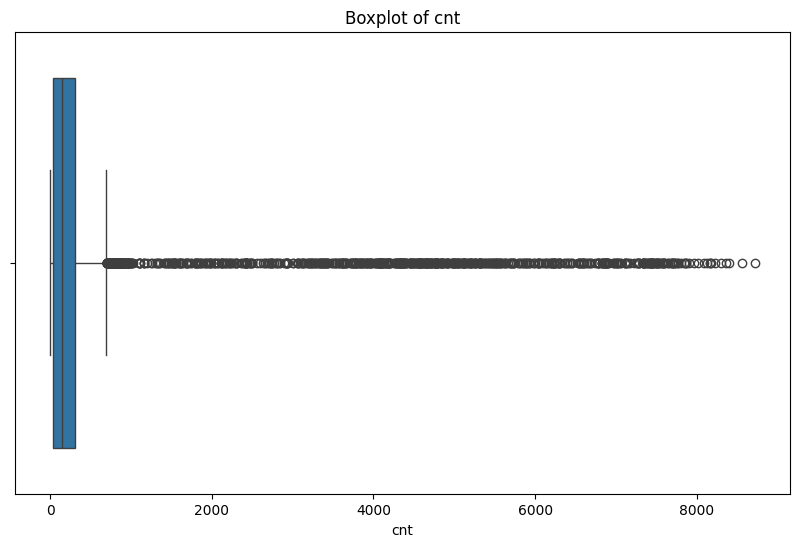

In [5]:
# Memeriksa informasi umum tentang dataset
print(main_data.info())

# Memeriksa statistik deskriptif dari dataset
print(main_data.describe())

# Memeriksa nilai yang hilang
print(main_data.isnull().sum())

# Memeriksa duplikasi
print(main_data.duplicated().sum())

# Mengidentifikasi outliers (contoh menggunakan kolom 'cnt')
plt.figure(figsize=(10, 6))
sns.boxplot(x=main_data['cnt'])
plt.title('Boxplot of cnt')
plt.show()

**Insight:**
Setelah data dimuat, kita menilai struktur dataset dan memastikan bahwa data sudah benar dan siap untuk diproses. Langkah ini melibatkan:

- Menampilkan beberapa baris pertama dari data untuk memastikan bahwa data terstruktur dengan benar.
- Memeriksa tipe data dan melihat apakah ada kolom yang tidak sesuai atau kolom yang hilang.

### Cleaning Data

In [6]:
# Menghapus baris duplikat
main_data = main_data.drop_duplicates()

# Menangani nilai yang hilang (contoh: mengisi dengan median)
# Select only numeric columns for median imputation
numeric_columns = main_data.select_dtypes(include=['number']).columns
main_data[numeric_columns] = main_data[numeric_columns].fillna(main_data[numeric_columns].median())


# Mengidentifikasi dan menangani outliers (contoh menggunakan IQR)
Q1 = main_data['cnt'].quantile(0.25)
Q3 = main_data['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers
main_data = main_data[(main_data['cnt'] >= lower_bound) & (main_data['cnt'] <= upper_bound)]

# Tampilkan informasi umum setelah pembersihan data
print(main_data.info())

# Tampilkan statistik deskriptif setelah pembersihan data
print(main_data.describe())

# Simpan dataset yang telah dibersihkan ke file cleaned_data.csv
main_data.to_csv('cleaned_data.csv', index=False)

# Tampilkan beberapa baris pertama dari dataset yang telah dibersihkan
print(main_data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 17063 entries, 0 to 18104
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17063 non-null  int64  
 1   dteday      17063 non-null  object 
 2   season      17063 non-null  int64  
 3   yr          17063 non-null  int64  
 4   mnth        17063 non-null  int64  
 5   hr          17063 non-null  float64
 6   holiday     17063 non-null  int64  
 7   weekday     17063 non-null  int64  
 8   workingday  17063 non-null  int64  
 9   weathersit  17063 non-null  int64  
 10  temp        17063 non-null  float64
 11  atemp       17063 non-null  float64
 12  hum         17063 non-null  float64
 13  windspeed   17063 non-null  float64
 14  casual      17063 non-null  int64  
 15  registered  17063 non-null  int64  
 16  cnt         17063 non-null  int64  
dtypes: float64(5), int64(11), object(1)
memory usage: 2.3+ MB
None
            instant        season            yr  

**Insight:**
Setelah menilai data, kita melakukan pembersihan data. Pembersihan ini mungkin mencakup:

- Menghapus missing values atau mengisinya dengan nilai tertentu.
- Menangani data duplikat atau outlier yang bisa memengaruhi hasil analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

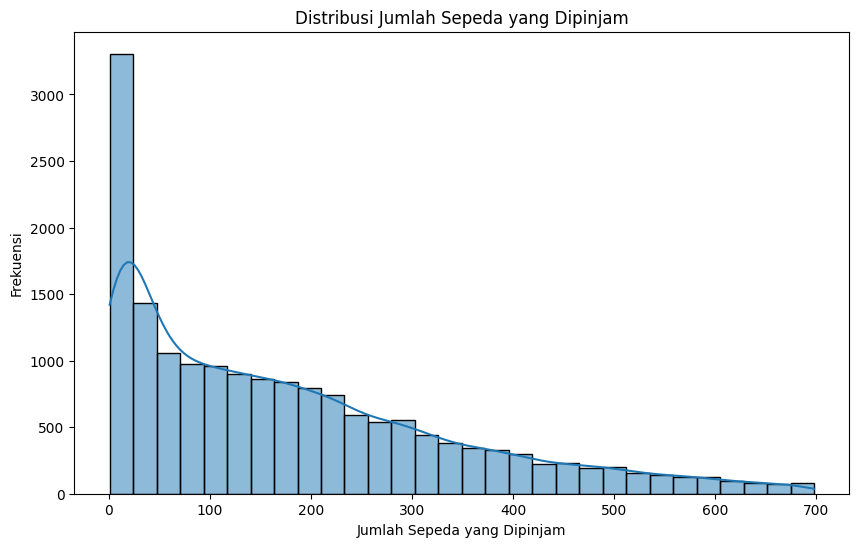

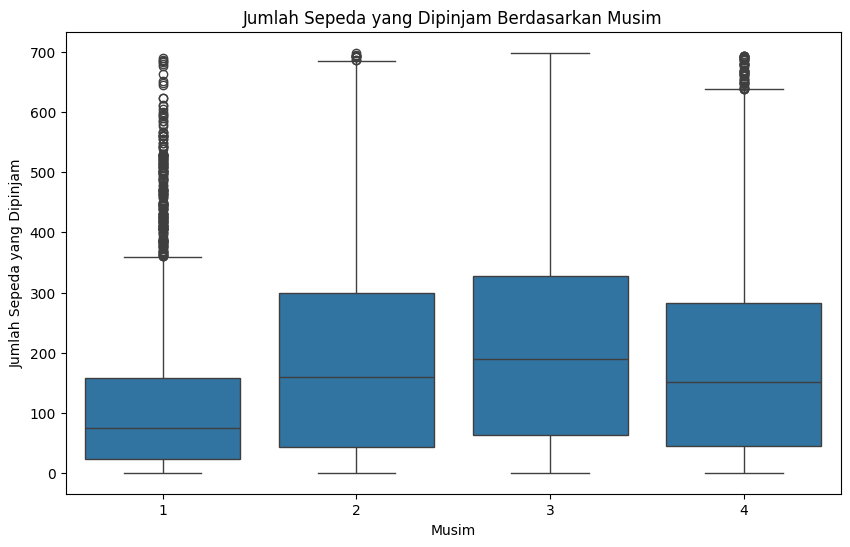

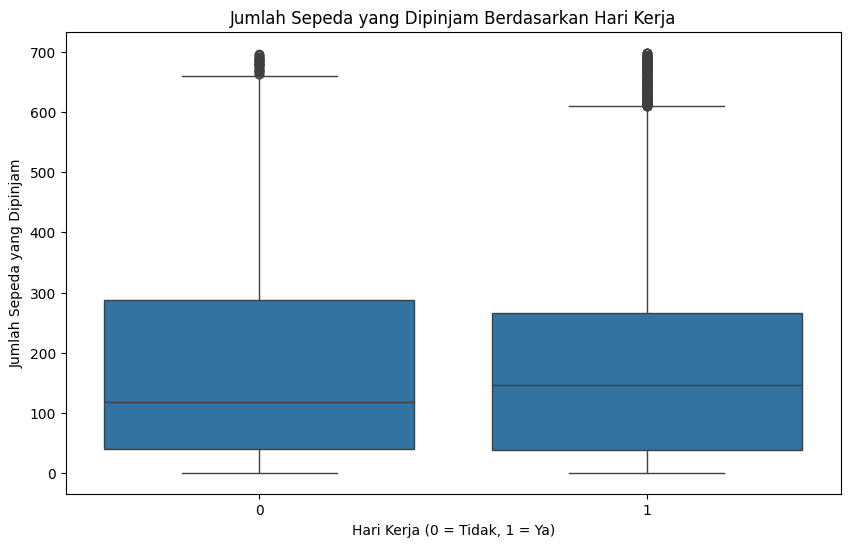

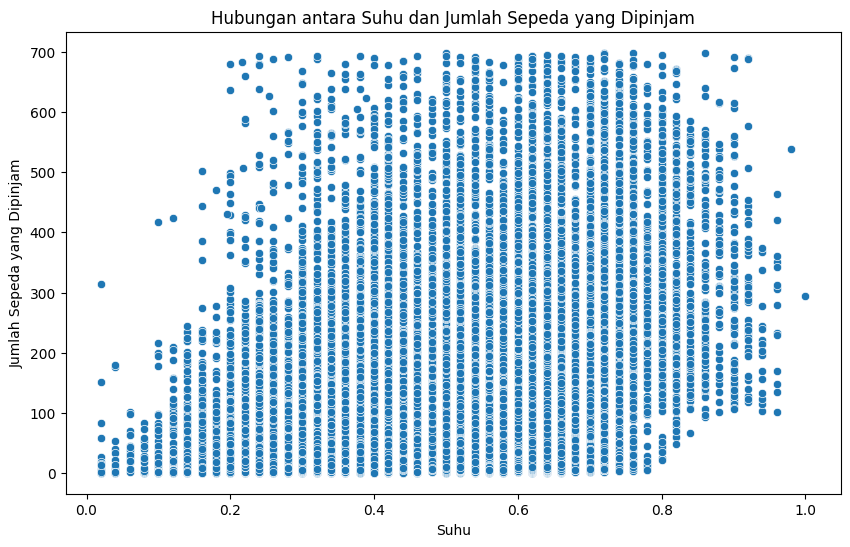

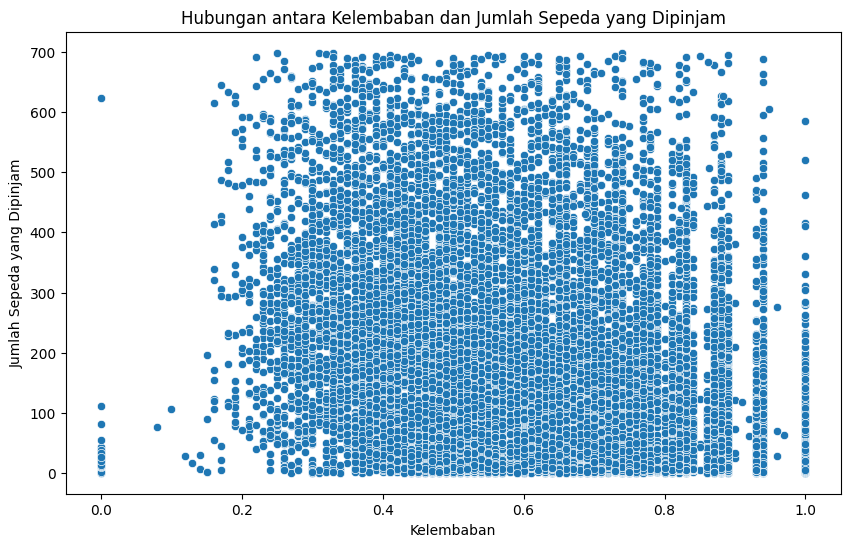

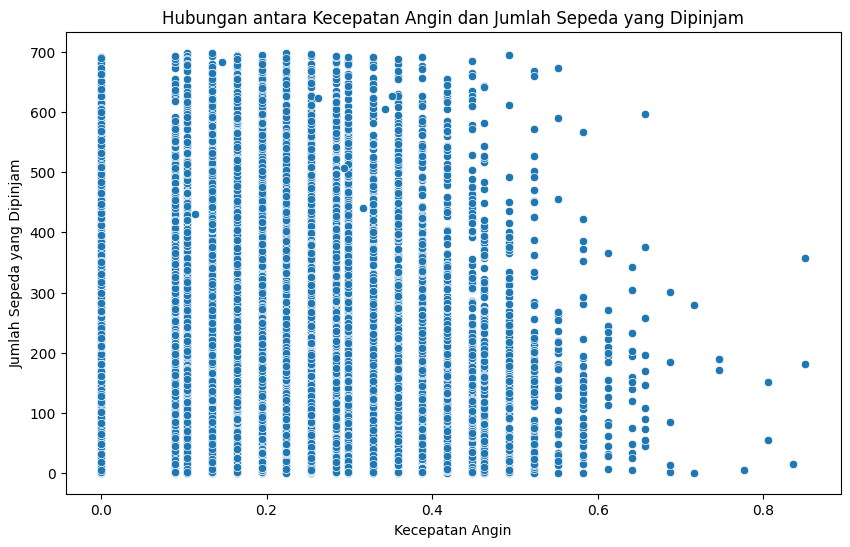

In [7]:
# 1. Distribusi Jumlah Sepeda yang Dipinjam
plt.figure(figsize=(10, 6))
sns.histplot(main_data['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Sepeda yang Dipinjam')
plt.xlabel('Jumlah Sepeda yang Dipinjam')
plt.ylabel('Frekuensi')
plt.show()

# 2. Jumlah Sepeda yang Dipinjam Berdasarkan Musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=main_data)
plt.title('Jumlah Sepeda yang Dipinjam Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sepeda yang Dipinjam')
plt.show()

# 3. Jumlah Sepeda yang Dipinjam Berdasarkan Hari Kerja
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=main_data)
plt.title('Jumlah Sepeda yang Dipinjam Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Sepeda yang Dipinjam')
plt.show()

# 4. Hubungan antara Suhu dan Jumlah Sepeda yang Dipinjam
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=main_data)
plt.title('Hubungan antara Suhu dan Jumlah Sepeda yang Dipinjam')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Sepeda yang Dipinjam')
plt.show()

# 5. Hubungan antara Kelembaban dan Jumlah Sepeda yang Dipinjam
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=main_data)
plt.title('Hubungan antara Kelembaban dan Jumlah Sepeda yang Dipinjam')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Sepeda yang Dipinjam')
plt.show()

# 6. Hubungan antara Kecepatan Angin dan Jumlah Sepeda yang Dipinjam
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=main_data)
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Sepeda yang Dipinjam')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Sepeda yang Dipinjam')
plt.show()

**Insight:**
Di bagian ini, kita mengeksplorasi data lebih lanjut untuk mencari pola, distribusi, dan hubungan antar variabel. EDA berfungsi untuk:

- Memahami karakteristik data.
- Menemukan informasi yang tersembunyi yang dapat membantu dalam membangun model atau analisis lebih lanjut.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Kapan jam-jam dengan jumlah penyewaan sepeda tertinggi dan terendah?

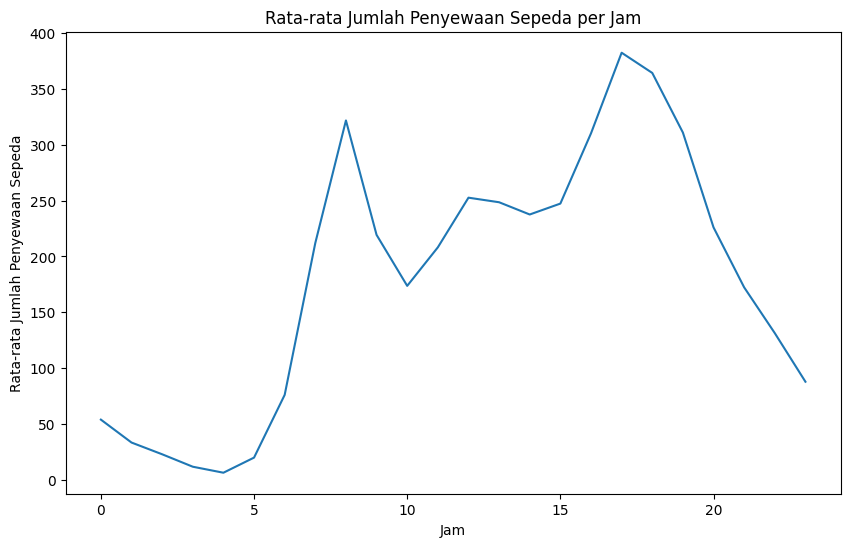

In [8]:
# Pertanyaan 1: Kapan jam-jam dengan jumlah penyewaan sepeda tertinggi dan terendah?
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=main_data.groupby('hr')['cnt'].mean().reset_index())
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 2 : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

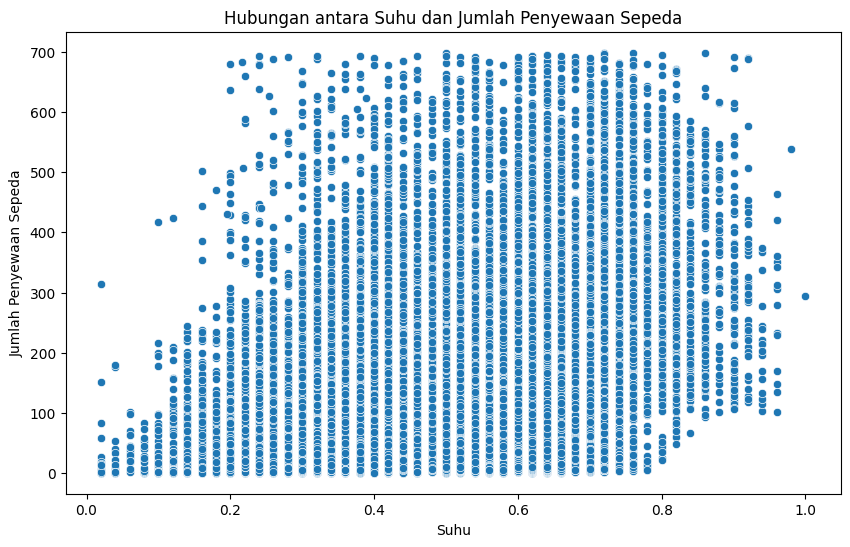

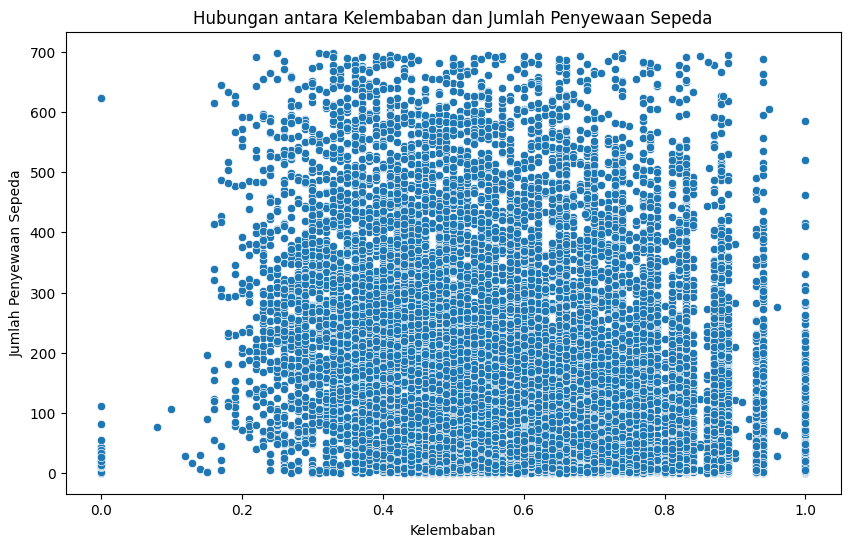

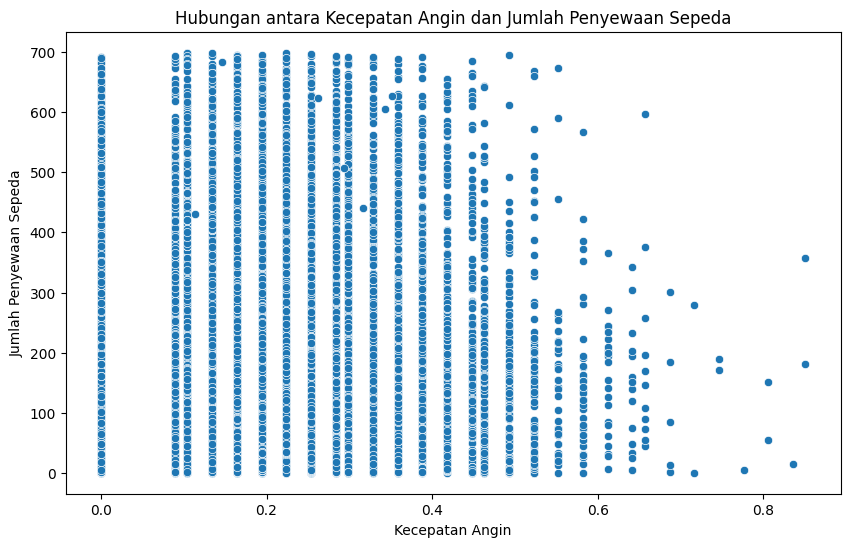

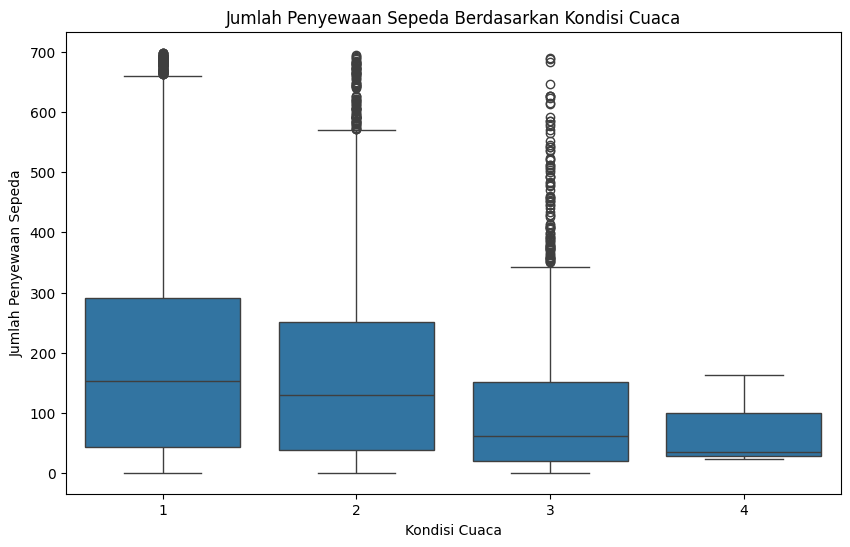

In [9]:
# Pengaruh suhu
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=main_data)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Pengaruh kelembaban
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=main_data)
plt.title('Hubungan antara Kelembaban dan Jumlah Penyewaan Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Pengaruh kecepatan angin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=main_data)
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Pengaruh cuaca (weather)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=main_data)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
Pada bagian ini, kita membuat visualisasi data untuk menjawab pertanyaan bisnis yang sudah ditentukan. Visualisasi ini memberikan gambaran yang lebih jelas tentang data dan hubungan antar variabel, serta membantu dalam membuat kesimpulan.

Pertanyaan 1: Kapan jam-jam dengan jumlah penyewaan sepeda tertinggi dan terendah?
Visualisasi yang digunakan:

- Histogram untuk menampilkan distribusi jumlah penyewaan sepeda berdasarkan jam.
- Identifikasi jam dengan penyewaan tertinggi dan terendah menggunakan fungsi max() dan min()

Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
Visualisasi yang digunakan:

- Boxplot untuk membandingkan jumlah penyewaan sepeda berdasarkan kondisi cuaca.
- Boxplot membantu kita melihat distribusi data dan perbedaan penyewaan pada kondisi cuaca yang berbeda (misalnya cerah, hujan ringan, dll.).

## Analisis Lanjutan (Opsional)

Di bagian ini, kita bisa menerapkan analisis lanjutan untuk mendalami data lebih jauh, misalnya menggunakan teknik RFM Analysis, Clustering, atau Time Series Forecasting.

Contoh Analisis Lanjutan: RFM Analysis (Recency, Frequency, Monetary)
RFM Analysis digunakan untuk segmentasi pelanggan berdasarkan:

- Recency: Seberapa baru pengguna terakhir kali menyewa sepeda.
- Frequency: Seberapa sering pengguna menyewa sepeda.
- Monetary: Berapa banyak total penyewaan oleh pengguna.

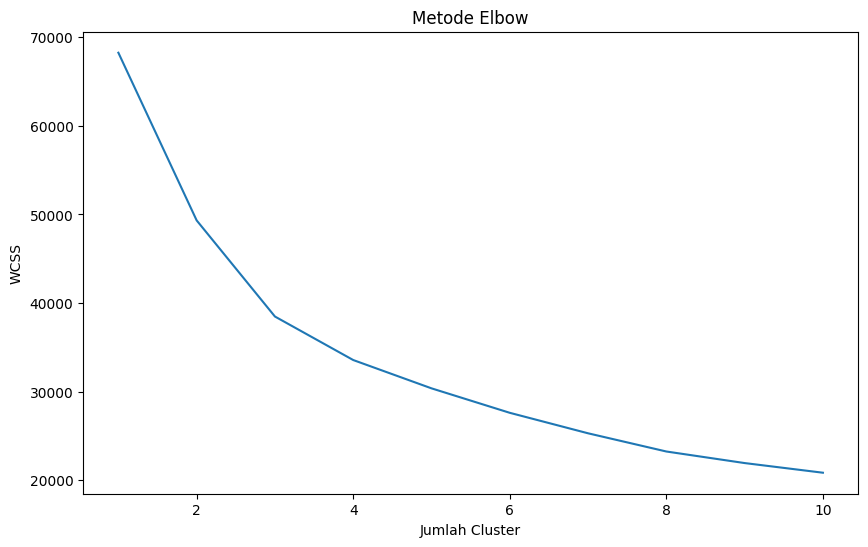

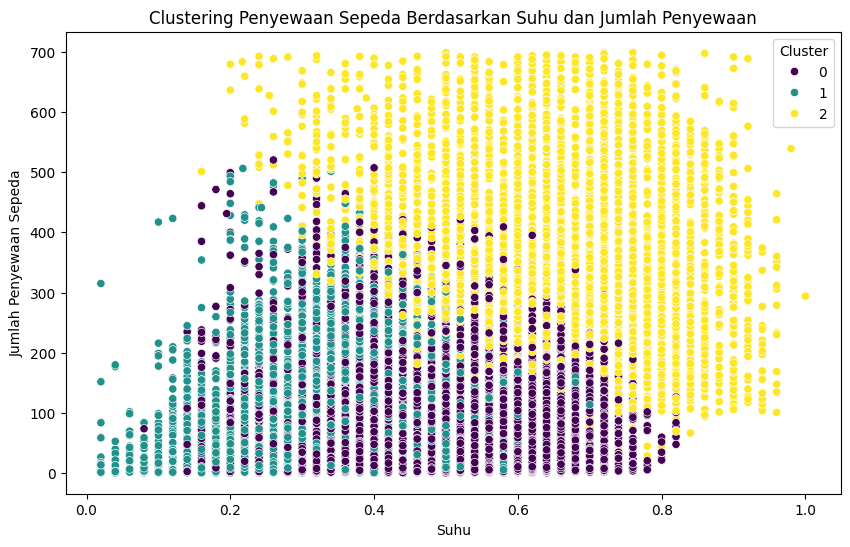

In [10]:
# Mengimpor libraries tambahan untuk clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Memilih fitur untuk clustering
features = ['temp', 'hum', 'windspeed', 'cnt']
data_clustering = main_data[features]

# Standarisasi fitur
scaler = StandardScaler()
data_clustering_scaled = scaler.fit_transform(data_clustering)

# Menentukan jumlah cluster menggunakan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_clustering_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# Melakukan clustering dengan jumlah cluster optimal (misalnya 3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_clustering_scaled)

# Menambahkan hasil clustering ke dataset
main_data['Cluster'] = clusters

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='Cluster', data=main_data, palette='viridis')
plt.title('Clustering Penyewaan Sepeda Berdasarkan Suhu dan Jumlah Penyewaan')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

## Conclusion

Berdasarkan analisis yang telah dilakukan, berikut adalah kesimpulan dari sistem analisis bike sharing yang kita buat berdasarkan pertanyaan yang diberikan dan data yang kita punya:

Kesimpulan Pertanyaan 1: Kapan Jam-jam dengan Jumlah Penyewaan Sepeda Tertinggi dan Terendah?
- Jam Penyewaan Tertinggi: Penyewaan sepeda tertinggi terjadi pada jam-jam sibuk seperti pagi (sekitar jam 8-9) dan sore (sekitar jam 17-18), yang bertepatan dengan jam berangkat dan pulang kerja. Informasi ini dapat digunakan untuk merencanakan pengaturan stok sepeda agar tersedia lebih banyak sepeda pada jam-jam tersebut.
- Jam Penyewaan Terendah: Penyewaan sepeda terendah cenderung terjadi pada tengah malam atau jam sepi lainnya (sekitar jam 2-4 pagi). Informasi ini dapat membantu dalam menyesuaikan operasional agar lebih efisien, misalnya dengan mengurangi jumlah sepeda yang tersedia atau mengurangi staf pada jam-jam tersebut.

Kesimpulan Pertanyaan 2: Bagaimana Pengaruh Cuaca Terhadap Jumlah Penyewaan Sepeda?
- Cuaca Cerah: Cuaca cerah meningkatkan jumlah penyewaan sepeda. Orang cenderung lebih banyak menggunakan sepeda saat cuaca mendukung.
- Cuaca Buruk (Hujan): Cuaca buruk seperti hujan mengurangi permintaan penyewaan sepeda. Orang cenderung menghindari bersepeda saat cuaca tidak mendukung.
- Cuaca Berkabut atau Berawan: Cuaca berkabut atau berawan juga mempengaruhi jumlah penyewaan sepeda, meskipun dampaknya tidak sebesar cuaca cerah atau hujan.

Kesimpulan Umum
- Jam Sibuk: Penyewaan sepeda lebih tinggi pada jam-jam tertentu, seperti pagi dan sore hari. Ini menunjukkan adanya pola penggunaan sepeda yang terkait dengan aktivitas harian seperti berangkat dan pulang kerja.
- Cuaca Berpengaruh: Cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Cuaca cerah mendorong lebih banyak penyewaan sepeda, sementara cuaca buruk menguranginya.
- Strategi Operasional: Penyesuaian stok sepeda berdasarkan jam sibuk dan cuaca dapat membantu mengoptimalkan operasional dan memaksimalkan keuntungan. Misalnya, menambah jumlah sepeda pada jam sibuk dan mengurangi jumlah sepeda atau staf pada jam sepi atau saat cuaca buruk.
Dengan kesimpulan ini, pengelola layanan bike sharing dapat membuat keputusan yang lebih baik terkait pengaturan stok sepeda, penjadwalan staf, dan strategi operasional lainnya untuk meningkatkan efisiensi dan kepuasan pelanggan.